# Plots for LDA projections and hyperplanes
### Content

+ [1. Notebook description](#1.-Notebook-Description)
+ [2. Sample Data](#2.-Sample-Data)
+ [3. Pseudo Margins and Projections](#3.-Pseudo-Margins-and-Projections)

---

# 1. Notebook Description

This notebook was used to create 3D plots to explain LDA for my thesis.
The margins are only pseudo-solutions for the sake of plotting!
In fact, all data generated here completely artificial.

---

**Imports:**

In [18]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Helpers:**

In [19]:
def ClosestPointOnLine(a, b, p):
    ap = p-a
    ab = b-a
    result = a + np.dot(ap,ab)/np.dot(ab,ab) * ab
    return result

def pseudo_lda(samples, a, b):
    psamples = samples.copy()
    for ix, sample in enumerate(psamples):
        psamples[ix] = ClosestPointOnLine(a, b, sample)
    a = psamples[n:,:].mean(axis=0)
    b = psamples[:n,:].mean(axis=0)
    m = (a+b)/2
    return psamples, m, a, b

def plot_projection(psamples, a, b):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xs=psamples[:n,0],
               ys=psamples[:n, 1],
               zs=psamples[:n, 2],
               c='r', marker='o', alpha=0.1)
    ax.scatter(xs=psamples[n:,0],
               ys=psamples[n:, 1],
               zs=psamples[n:, 2],
               c='b', marker='o', alpha=0.1)

    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    ax.set_zlim([-10,10])
    ticks = [10,5,0,-5,-10]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5, colors=['#002070'], alpha=0.3)
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5, colors=['#002070'], alpha=0.2)
    #ax.view_init(45, 45)
    ax.plot(*zip(a,b), c='black', marker='o')

# 2. Sample Data

In [20]:
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

n = 80
f1 = randrange(n, -10, -5)
f2 = randrange(n, -10, 10)
f3 = randrange(n, -10, 10)
#f1 = f1 + (f2**2 + f3**2)/50
samples = np.array([f1, f2, f3]).T
f1 = randrange(n, 5, 10)
f2 = randrange(n, -10, 10) 
f3 = randrange(n, -10, 10)
#f1 = f1 - ((10-np.abs(f2))**2 + (10-np.abs(f3))**2)/100
samples = np.concatenate([samples, np.array([f1, f2, f3]).T])

# plane
r = np.linspace(-10,10,100)
Y, Z = np.meshgrid(r,r)

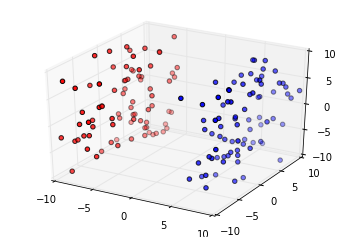

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=samples[:n,0],
           ys=samples[:n, 1],
           zs=samples[:n, 2],
           c='r', marker='o')
ax.scatter(xs=samples[n:,0],
           ys=samples[n:, 1],
           zs=samples[n:, 2],
           c='b', marker='o')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
ticks = [10,5,0,-5,-10]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
plt.show()

# 3. Pseudo Margins and Projections

## arbitrary means

In [22]:
#a = np.array([0, -10, -10])
a = np.array([-10, -10,0])
b = -a
(psamples, m, a, b) = pseudo_lda(samples, a, b)

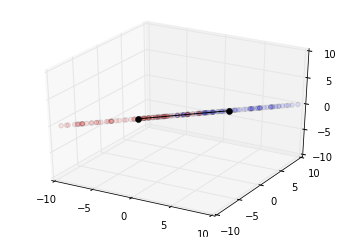

In [23]:
plot_projection(psamples, a, b)

## "best" means 

In [24]:
lda = LinearDiscriminantAnalysis(solver='lsqr')

X = samples
y = np.array(([0]*n, [1]*n)).flatten()

lda.set_params(store_covariance=True)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='lsqr', store_covariance=True, tol=0.0001)

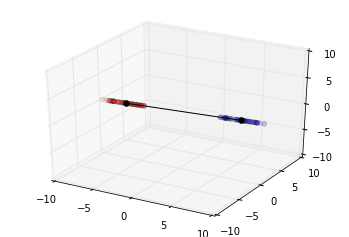

In [25]:
a, b = lda.means_
(psamples, m, a, b) = pseudo_lda(samples, a, b)
plot_projection(psamples, a, b)

## plot the hyperplane

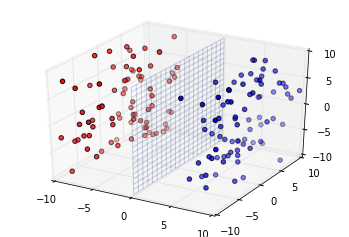

In [26]:
X = np.zeros((100,100)) + m[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=samples[:n,0],
           ys=samples[:n, 1],
           zs=samples[:n, 2],
           c='r', marker='o')
ax.scatter(xs=samples[n:,0],
           ys=samples[n:, 1],
           zs=samples[n:, 2],
           c='b', marker='o')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
ticks = [10,5,0,-5,-10]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5, colors=['#002070'], alpha=0.2)
#ax.plot(*zip(a,m,b), c='black', marker='o')
plt.show()